In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CEM_DE

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CEM_DE


In [3]:
from tqdm import tqdm
import yaml
import os
import pandas as pd
from IPython.display import display
from scipy.stats import ttest_ind

In [44]:
def search_all_module_names(root_dir='my_library'):
    from collections import deque
    from os import scandir

    res = [root_dir]
    dirs = deque([root_dir])
    
    while len(dirs) > 0:
        dir = dirs.popleft()
        for f in scandir(dir):
            if f.name.startswith('__') or f.name.startswith('.'):
                continue
            if f.is_dir():
                dirs.append(f.path)

            split_by = '\\'
            if split_by not in f.path:
              split_by = '/'
            res.append('.'.join(f.path.split(split_by)))
            # Remove '.py'
            if not f.is_dir():
                res[-1] = res[-1][:-3]

    return res
def reload_all_modules(root_dir='library'):
  from importlib import reload, import_module
  from sys import modules

  for module_name in search_all_module_names(root_dir):
    import_module(module_name)
    reload(modules[module_name])
reload_all_modules()

In [45]:
from library.utils import mean_and_std, line_distribution_v2, lines_plot
from library.zip2 import zip2

In [7]:
algorithms = ['CEM', 'DE']
bechmarks = ['Sphere', 'Zakharov', 'Rosenbrock', 'Michalewicz', 'Ackley']
dimensions = [2, 10]
pop_sizes = [32, 64, 128, 256, 512, 1024]
seeds = list(range(20520864, 20520864 + 10))
log_folder = 'log'

In [13]:
# result = dict()
# for algo_name, fobj_name, d, pop_size in tqdm(zip2(algorithms, bechmarks, dimensions, pop_sizes)):
#     res_key = (algo_name, fobj_name, d, pop_size)
#     result[res_key] = dict()
#     result[res_key]['losses'] = []
#     result[res_key]['lines'] = []

#     lines = result[res_key]['lines']
#     final_loss_values = result[res_key]['losses']
#     for seed in seeds:
#         log_key = (algo_name, fobj_name, d, pop_size, seed)
#         file_name = '.'.join(map(str, log_key))
#         log_path = os.path.join(log_folder, file_name + '.yaml')
#         with open(log_path, 'r') as f:
#             log_data = yaml.unsafe_load(f)
        
#         x = log_data[log_key]['num_eval_cals']
#         y = log_data[log_key]['best_fitness']
#         lines.append((x, y))
#         final_loss_values.append(y[-1])


100%|██████████| 120/120 [2:17:20<00:00, 68.67s/it]


In [20]:
tables = dict()
for fobj_name, d in tqdm(zip2(bechmarks, dimensions)):
    table_key = (fobj_name, d)
    tables[table_key] = dict()
    table = tables[table_key]
    for algo_name in algorithms:
        table[algo_name] = []
        column = table[algo_name]
        for pop_size in pop_sizes:
            res_key = (algo_name, fobj_name, d, pop_size)
            final_loss_values = result[res_key]['losses']
            mean_loss, loss_std = mean_and_std(final_loss_values)
            # mean_loss = round(mean_loss, 4)
            # loss_std = round(loss_std, 4)
            column.append(f'{mean_loss} ({loss_std})')

100%|██████████| 10/10 [00:00<00:00, 1099.74it/s]


In [21]:
for key, data in tables.items():
    fobj_name, d = key
    df = pd.DataFrame(data=data)
    df['pop_size'] = pop_sizes
    df.set_index('pop_size')

    print(key)
    display(df)
    print('Các trường hợp có ý nghĩa thống kê:')

    for pop_size in pop_sizes:
        res_key = (algorithms[0], fobj_name, d, pop_size)
        a = result[res_key]['losses']
        res_key = (algorithms[1], fobj_name, d, pop_size)
        b = result[res_key]['losses']
        
        if ttest_ind(a,b).pvalue < 0.05:
            print(f'\t\t\t {pop_size}')
    print('#########################################')

('Sphere', 2)


,CEM,DE,pop_size
0,0.0 (0.0),0.0 (0.0),32
1,0.0 (0.0),4.931275319855499e-280 (2.4570464290094194e-279),64
2,2.576883413221632e-236 (6.643166984295355e-236),8.43255769566754e-142 (3.8519307484775615e-141),128
3,9.347227526689974e-119 (1.5256082451490393e-118),7.705306932516319e-72 (2.404667614498591e-71),256
4,2.3267144814821317e-60 (3.262472603017371e-60),3.5814386526441876e-37 (6.8130563877507326e-37),512
5,4.098519744531288e-31 (8.492331384076302e-31),9.248846913689653e-20 (2.5376397926679287e-19),1024


Các trường hợp có ý nghĩa thống kê:
			 64
			 256
			 512
			 1024
#########################################
('Sphere', 10)


,CEM,DE,pop_size
0,3.462961040880273e-207 (2.7025502844989048e-207),0.0 (0.0),32
1,1.3381090789449005e-100 (1.0116932928882573e-100),2.7129556563295884e-299 (1.2263764312215255e-298),64
2,3.54160244901703e-49 (3.2580756506700946e-49),5.885625700654069e-146 (2.6089121823705336e-145),128
3,4.8433988578582506e-24 (3.0975947504319078e-24),2.4161528028708076e-72 (4.1301718702491813e-72),256
4,1.059748056499739e-11 (4.6938609853577364e-12),1.1709875831430662e-35 (1.0150300115791597e-35),512
5,1.3431362839392191e-05 (8.726511910892837e-06),1.4392615696911767e-17 (8.5090505420984e-18),1024


Các trường hợp có ý nghĩa thống kê:
			 32
			 64
			 128
			 256
			 512
			 1024
#########################################
('Zakharov', 2)


,CEM,DE,pop_size
0,0.0 (0.0),0.0 (0.0),32
1,0.0 (0.0),9.03202087016615e-261 (4.591294329678639e-260),64
2,7.95998022372222e-236 (1.620099093552763e-235),1.365677179024208e-131 (4.808240288801392e-131),128
3,3.920909887520313e-118 (8.737692466526261e-118),4.1577117243829556e-66 (1.2482326501205196e-65),256
4,8.040613524707204e-60 (1.390036014716996e-59),1.5526863282552495e-33 (4.613010769516551e-33),512
5,1.0102899595312517e-30 (2.4488075464458496e-30),1.292880889106304e-17 (2.1107595082808274e-17),1024


Các trường hợp có ý nghĩa thống kê:
			 64
			 128
			 256
			 512
			 1024
#########################################
('Zakharov', 10)


,CEM,DE,pop_size
0,6.011619791614792e-164 (1.363365788068956e-163),6.755595485529626e-191 (3.1002664083170975e-190),32
1,4.632033276005748e-75 (5.535414873746983e-75),1.5927005378009195e-87 (4.228237888021627e-87),64
2,6.503068711574273e-35 (9.362502036130888e-35),8.68540614585126e-41 (1.9633303759220384e-40),128
3,4.595207475407195e-16 (6.516008481678711e-16),1.085321618155065e-18 (1.9908832087654405e-18),256
4,4.425701666424205e-07 (3.037462943949383e-07),7.617059996908002e-08 (3.792874621271059e-08),512
5,0.0145179919443327 (0.01075867094769395),0.013340845866896534 (0.007866066410722865),1024


Các trường hợp có ý nghĩa thống kê:
			 32
			 64
			 128
			 256
			 512
#########################################
('Rosenbrock', 2)


,CEM,DE,pop_size
0,0.16647269729084105 (0.6646164582401459),0.0 (0.0),32
1,0.026153959654271124 (0.09099743342534831),0.0 (0.0),64
2,0.02406616731698329 (0.06373328310893088),0.0 (0.0),128
3,0.015377897112414593 (0.047451352812615255),0.0 (0.0),256
4,0.004413342570063009 (0.012905622517647314),2.050094403726669e-15 (6.359478082535055e-15),512
5,0.0032241068833445885 (0.008847002210070471),4.2355915277592264e-07 (7.895799802509815e-07),1024


Các trường hợp có ý nghĩa thống kê:
			 128
			 256
			 512
			 1024
#########################################
('Rosenbrock', 10)


,CEM,DE,pop_size
0,8.66483585699595e-28 (7.804581263627517e-28),0.0 (0.0),32
1,3.5407984752990184e-27 (2.3834948735451354e-27),0.0 (0.0),64
2,1.0451029091821333e-22 (2.7814437088255263e-22),2.2061960061413857e-23 (2.764082485696609e-23),128
3,5.667050425671594e-10 (7.604320042684992e-10),9.009329247792877e-11 (8.341114516133533e-11),256
4,0.005620455120587738 (0.004519780246897287),0.00018490873601877738 (0.0001332933851412051),512
5,4.795768710634517 (0.48280118931377114),0.43734710823637224 (0.13280894840267582),1024


Các trường hợp có ý nghĩa thống kê:
			 32
			 64
			 256
			 512
			 1024
#########################################
('Michalewicz', 2)


,CEM,DE,pop_size
0,-1.8013034100985539 (9.128167018299422e-16),-1.8013034100985539 (7.021666937153401e-16),32
1,-1.8013034100985539 (7.021666937153401e-16),-1.8013034100985539 (7.021666937153401e-16),64
2,-1.8013034100985539 (7.021666937153401e-16),-1.8013034100985539 (7.021666937153401e-16),128
3,-1.8013034100985539 (7.021666937153401e-16),-1.8013034100985539 (7.021666937153401e-16),256
4,-1.8013034100985539 (7.021666937153401e-16),-1.8013034100985539 (7.021666937153401e-16),512
5,-1.8013034100985539 (7.021666937153401e-16),-1.8013034100985539 (9.830333712014763e-16),1024


Các trường hợp có ý nghĩa thống kê:
#########################################
('Michalewicz', 10)


,CEM,DE,pop_size
0,-8.439400716223645 (1.471409751642992),-9.639674432965581 (0.06164877095580943),32
1,-9.10639706682278 (0.6405475584909067),-9.651799153373162 (0.04226099370535949),64
2,-9.289292673566615 (0.9044427005291774),-9.660151715641348 (0.0),128
3,-9.418403403326824 (0.4359775168708806),-9.660151715641348 (0.0),256
4,-9.39565235818873 (0.2873574231921705),-9.660151425121521 (1.241909957300516e-06),512
5,-9.009274415487127 (0.5634878050132986),-9.290970561116778 (0.18245218877722866),1024


Các trường hợp có ý nghĩa thống kê:
			 32
			 64
			 128
			 256
			 512
			 1024
#########################################
('Ackley', 2)


,CEM,DE,pop_size
0,0.0 (0.0),0.0 (0.0),32
1,0.0 (0.0),0.0 (0.0),64
2,0.0 (0.0),0.0 (0.0),128
3,0.0 (0.0),0.0 (0.0),256
4,0.0 (0.0),0.0 (0.0),512
5,1.0302869668521452e-14 (1.4829760571267982e-14),5.858837326400135e-09 (8.305981499427416e-09),1024


Các trường hợp có ý nghĩa thống kê:
			 1024
#########################################
('Ackley', 10)


,CEM,DE,pop_size
0,3.552713678800501e-15 (0.0),2.1316282072803005e-15 (5.392640207733813e-15),32
1,3.197442310920451e-15 (2.0222400779001796e-15),3.552713678800501e-15 (0.0),64
2,2.842170943040401e-15 (3.595093471822542e-15),2.4868995751603505e-15 (4.718560181767086e-15),128
3,1.9759482938752627e-11 (6.1660346908596365e-12),3.197442310920451e-15 (2.0222400779001796e-15),256
4,2.9456114962300717e-05 (7.1898581251614835e-06),3.552713678800501e-15 (0.0),512
5,0.03709653258766501 (0.012422471788040413),4.343022901309723e-08 (1.8561203580342945e-08),1024


Các trường hợp có ý nghĩa thống kê:
			 32
			 256
			 512
			 1024
#########################################


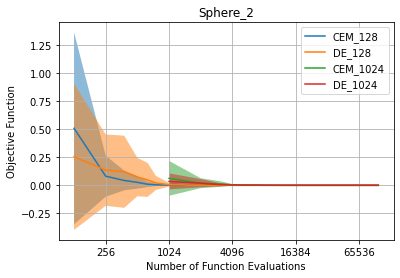

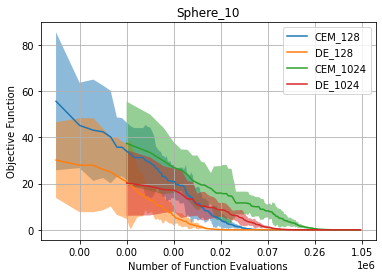

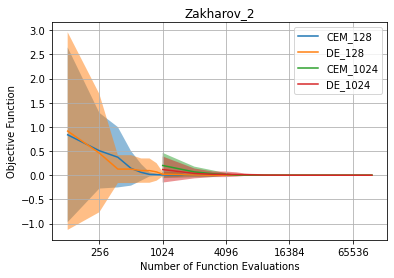

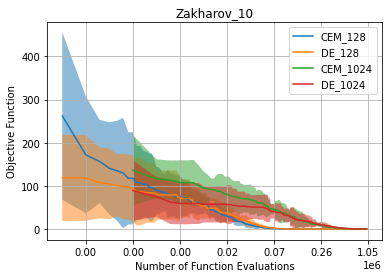

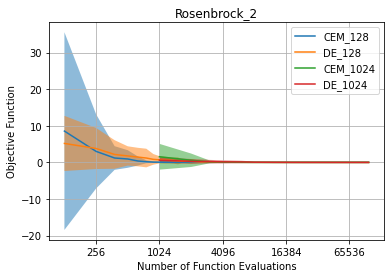

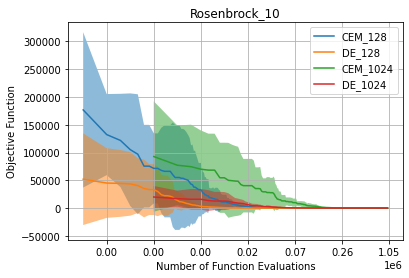

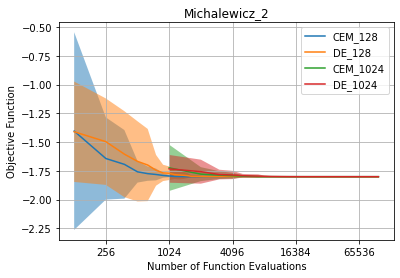

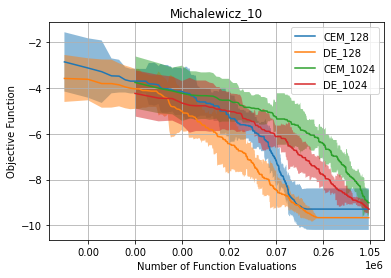

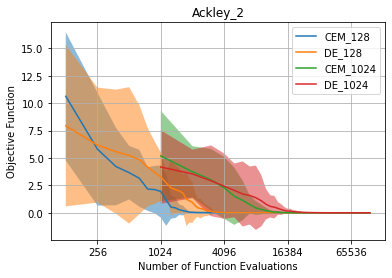

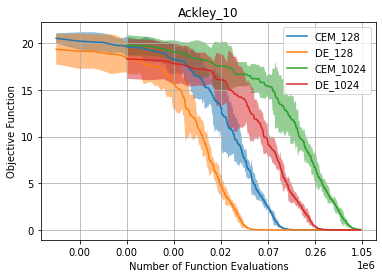

In [46]:
for fobj_name, d in zip2(bechmarks, dimensions):
    lines = []
    labels = []
    for pop_size, algo_name in zip2([128, 1024], algorithms):
        res_key = (algo_name, fobj_name, d, pop_size)
        line = line_distribution_v2(result[res_key]['lines'])
        lines.append(line)
        labels.append(f'{algo_name}_{pop_size}')

    title = f'{fobj_name}_{d}'
    lines_plot(
        lines=lines,
        labels=labels,
        title=title,
        xlabel='Number of Function Evaluations',
        ylabel='Objective Function',
        basex=2,
        )